## import data and libraries 

In [430]:
import pandas as pd
import numpy as np

In [431]:
data = pd.read_csv('Financials.csv')

In [432]:
data.columns = [col.lower().replace(' ','')for col in data.columns]

In [433]:
data.head(5)

,segment,country,product,discountband,unitssold,manufacturingprice,saleprice,grosssales,discounts,sales,cogs,profit,date,monthnumber,monthname,year
0,Government,Canada,Carretera,None,"$1,618.50",$3.00,$20.00,"$32,370.00",$-,"$32,370.00","$16,185.00","$16,185.00",01/01/2014,1,January,2014
1,Government,Germany,Carretera,None,"$1,321.00",$3.00,$20.00,"$26,420.00",$-,"$26,420.00","$13,210.00","$13,210.00",01/01/2014,1,January,2014
2,Midmarket,France,Carretera,None,"$2,178.00",$3.00,$15.00,"$32,670.00",$-,"$32,670.00","$21,780.00","$10,890.00",01/06/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,$888.00,$3.00,$15.00,"$13,320.00",$-,"$13,320.00","$8,880.00","$4,440.00",01/06/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,"$2,470.00",$3.00,$15.00,"$37,050.00",$-,"$37,050.00","$24,700.00","$12,350.00",01/06/2014,6,June,2014


## change column types from string to float 

In [434]:
def replace(x,replacements,new) : 
    
    for i in replacements:
        data[x] = data[x].str.replace(i,new)

In [435]:
replacements = [' ','$',',','(',')']
cols_to_replace = ['unitssold','manufacturingprice','saleprice','grosssales','sales','cogs','profit','discounts']

for col in cols_to_replace:
    replace(col,replacements,'')
    replace(col,'-','0')
    

In [436]:
def change_type(x):
    data[x] = data[x].astype('float32')

for col in cols_to_replace:
    change_type(col)

## we have seperate columns for month year and day of month so we will drop column date and month

In [437]:
data.drop(columns=['date','monthname'],inplace=True)

## general info

In [438]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   segment             700 non-null    object 
 1   country             700 non-null    object 
 2   product             700 non-null    object 
 3   discountband        700 non-null    object 
 4   unitssold           700 non-null    float32
 5   manufacturingprice  700 non-null    float32
 6   saleprice           700 non-null    float32
 7   grosssales          700 non-null    float32
 8   discounts           700 non-null    float32
 9   sales               700 non-null    float32
 10  cogs                700 non-null    float32
 11  profit              700 non-null    float32
 12  monthnumber         700 non-null    int64  
 13  year                700 non-null    int64  
dtypes: float32(8), int64(2), object(4)
memory usage: 54.8+ KB


In [439]:
data.describe()

,unitssold,manufacturingprice,saleprice,grosssales,discounts,sales,cogs,profit,monthnumber,year
count,700.000000,700.000000,700.000000,7.000000e+02,700.000000,7.000000e+02,700.000000,700.000000,700.000000,700.000000
mean,1608.294312,96.477142,118.428574,1.827594e+05,13150.354492,1.696091e+05,145475.203125,26354.777344,7.900000,2013.750000
std,867.427734,108.602745,136.775131,2.542622e+05,22962.931641,2.367263e+05,203865.375000,41426.773438,3.377321,0.433322
min,200.000000,3.000000,7.000000,1.799000e+03,0.000000,1.655080e+03,918.000000,0.000000,1.000000,2013.000000
25%,905.000000,5.000000,12.000000,1.739175e+04,800.320007,1.592800e+04,7490.000000,3815.707520,5.750000,2013.750000
50%,1542.500000,10.000000,20.000000,3.798000e+04,2585.250000,3.554020e+04,22506.250000,11110.549805,9.000000,2014.000000
75%,2229.125000,250.000000,300.000000,2.790250e+05,15956.347412,2.610775e+05,245607.500000,23756.360352,10.250000,2014.000000
max,4492.500000,260.000000,350.000000,1.207500e+06,149677.500000,1.159200e+06,950625.000000,262200.000000,12.000000,2014.000000


## null values and  duplicates 

In [440]:
data.isnull().sum().sum()

0

### zero nulls thats good 

In [441]:
data.duplicated().sum()

0

### zero duplicates that good 

## see the distributions of our data 

In [442]:
import seaborn as sns
import matplotlib.pyplot as plt

In [443]:
columns_plot = [col for col in data.columns  if type(data[col].values[0]) == np.float32]

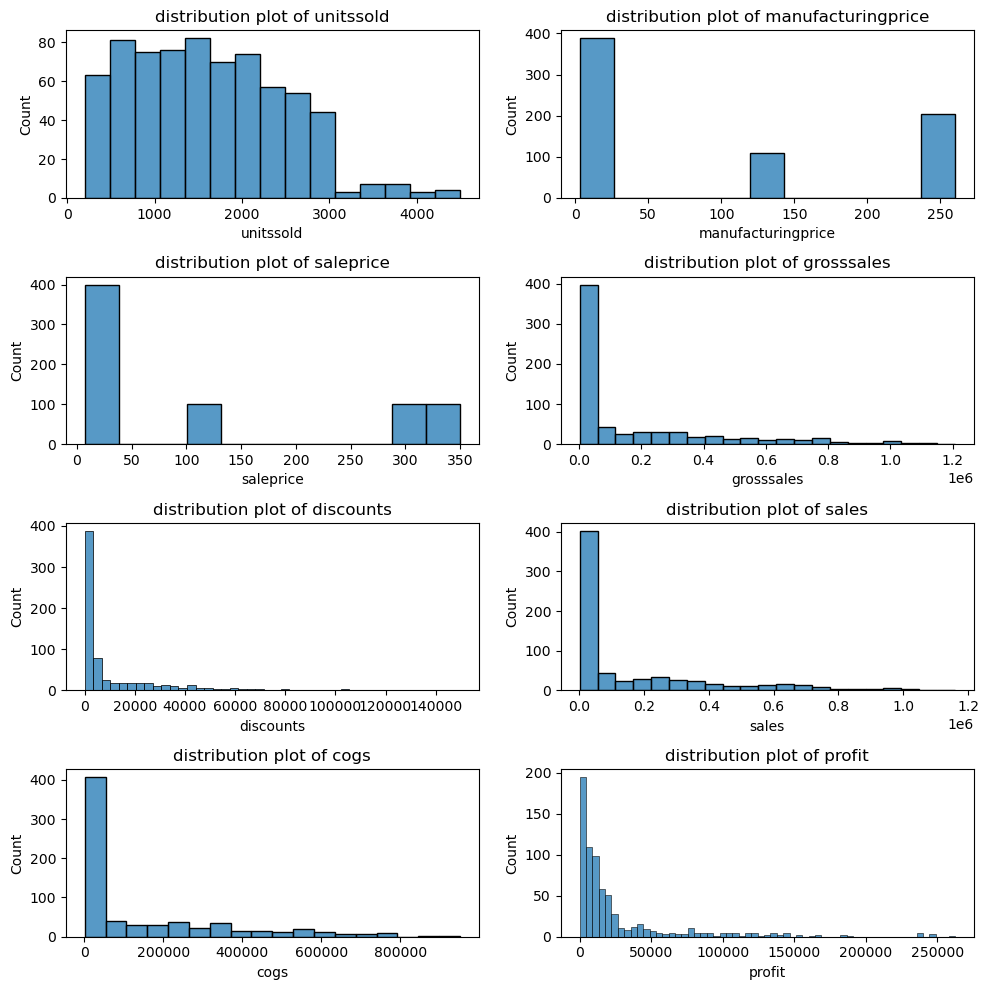

In [444]:
plt.figure(figsize=(10,10))
for i in range(len(columns_plot)):
    plt.subplot(4,2,i+1)
    sns.histplot(data[columns_plot[i]])
    plt.title(f'distribution plot of {columns_plot[i]}')
plt.tight_layout()
plt.show()


### we have data for two years 

In [445]:
data['year'].unique()

array([2014, 2013], dtype=int64)

### we sell in 5 diferent types of customers 

In [446]:
data['segment'].unique()

array(['Government', 'Midmarket', 'Channel Partners', 'Enterprise',
       'Small Business'], dtype=object)

### we have 3 types of discounts

In [447]:
data['discountband'].unique()

array([' None ', ' Low ', ' Medium ', ' High '], dtype=object)

### we have 6 diferent products 

In [448]:
data['product'].unique()


array([' Carretera ', ' Montana ', ' Paseo ', ' Velo ', ' VTT ',
       ' Amarilla '], dtype=object)

### we sell in 5 diferent countrys 

In [449]:
data['country'].unique()

array(['Canada', 'Germany', 'France', 'Mexico',
       'United States of America'], dtype=object)

# questions to awsner : 

## Question 1: What product had the biggest cost of goods sold for each year?

In [450]:
q1 = data.query('year == 2013').groupby('product').sum()['cogs'].reset_index().sort_values(by='cogs',ascending=False)

<Axes: xlabel='product'>

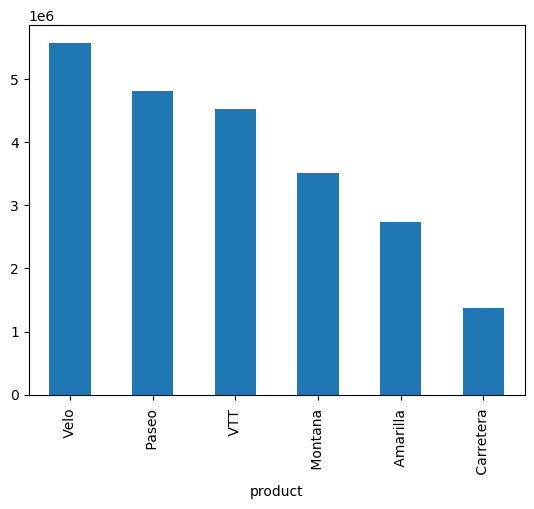

In [451]:
q1.plot(kind='bar',x='product',y='cogs',legend=False)

In [452]:
print('the product with the highest cog for 2013 is Velo with cost = 5575350.0')

the product with the highest cog for 2013 is Velo with cost = 5575350.0


<Axes: xlabel='product'>

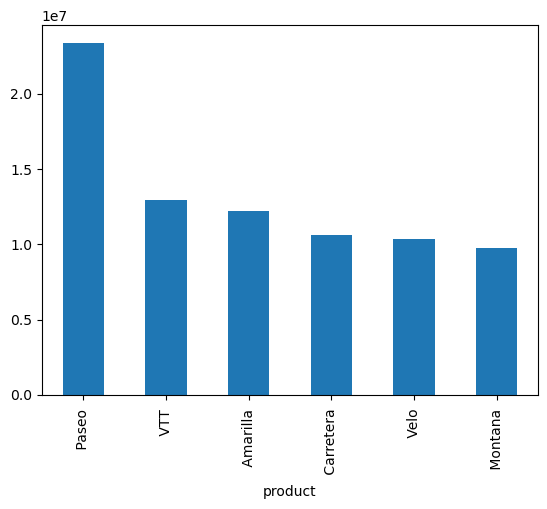

In [453]:
q11 = data.query('year == 2014').groupby('product').sum()['cogs'].reset_index().sort_values(by='cogs',ascending=False)
q11.plot(kind='bar',x='product',y='cogs',legend=False)

In [454]:
print('the product with the highest cog for 2014 is Paseo with cost = 23398812.0')

the product with the highest cog for 2014 is Paseo with cost = 23398812.0


## Question 2: wich country made the biggest profit for November 2014?

In [455]:
q2 = data.query('monthnumber == 11 and year==2014').groupby('country').sum()['profit'].reset_index().sort_values(by='profit')

<Axes: xlabel='country'>

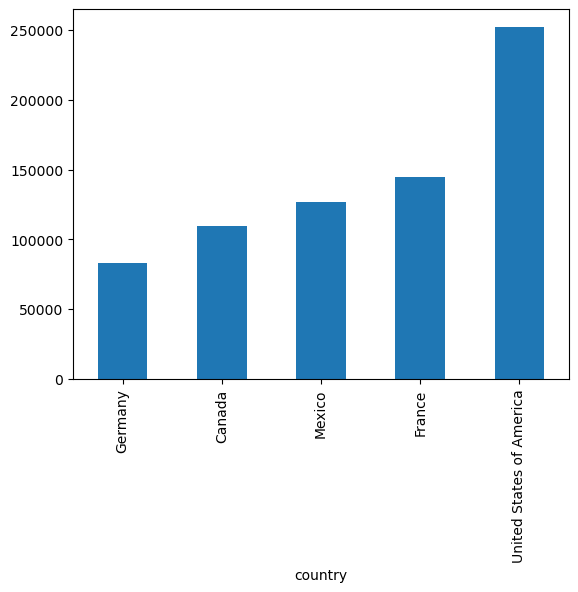

In [456]:
q2.plot(kind='bar',x='country',y='profit',legend=False)

In [457]:
print('the country that made the biggest profit for month november and year 2014 is USA')

the country that made the biggest profit for month november and year 2014 is USA


## Question 3: wich country has had the biggest profit so far?

In [458]:
print(f"country {data.groupby('country').sum()['profit'].index.max()} had the biggest profil equal to  =\
{data.groupby('country').sum()['profit'].max()}")

country United States of America had the biggest profil equal to  =4032488.25


## Question 4: What product has had the biggest profit so far?

In [459]:
print(f"product {data.groupby('product').sum()['profit'].index.max()} had the biggest profil equal to  = {data.groupby('product').sum()['profit'].max()}")

product  Velo  had the biggest profil equal to  = 5038535.5


## Question 5: does it worth more to sell in the government or in small businesses in Canada? 

In [460]:
gov = data.query('segment =="Government"').groupby('segment').sum()['profit'][0]

C:\Users\mplan\AppData\Local\Temp\ipykernel_14440\2948922686.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  gov = data.query('segment =="Government"').groupby('segment').sum()['profit'][0]


In [461]:
small = data.query('segment =="Small Business"').groupby('segment').sum()['profit'][0]

C:\Users\mplan\AppData\Local\Temp\ipykernel_14440\2424315148.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  small = data.query('segment =="Small Business"').groupby('segment').sum()['profit'][0]


In [462]:
if gov> small:
    print('its more profitable selling to the goverments')
else:
    print('its more profitable selling to small businesses')
    

its more profitable selling to the goverments


## Question 6: wich country had the most 'high' discount band?

In [476]:
data.query("discountband == 'High'").groupby('country').count()['discountband'].reset_index()\
.rename(columns={'discountband':'total'}).sort_values(by='total',ascending=False)

,country,total


In [477]:
print('Mexico had the most "high" discount band with a total of 56')

Mexico had the most "high" discount band with a total of 56


## Question 7: wich country had the highest gross sales for 2013?

<Axes: xlabel='country'>

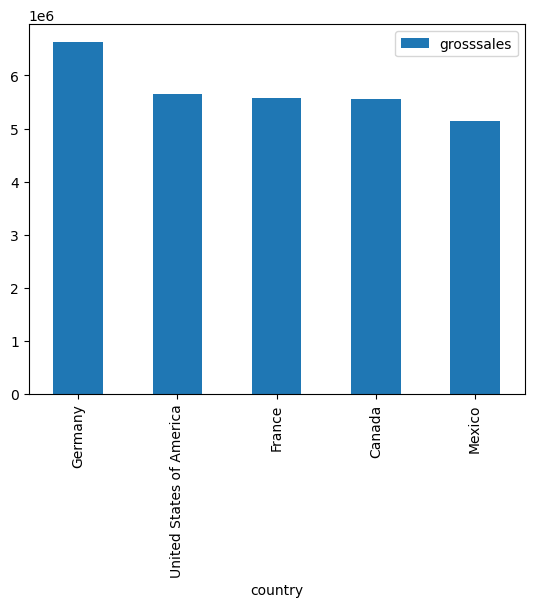

In [478]:
data.query('year==2013').groupby('country').sum()['grosssales'].reset_index().sort_values(by='grosssales',ascending=False)\
.plot(kind='bar',x ='country',y = 'grosssales' )

In [480]:
print('germany had the highest gross sales in year 2013')

germany had the highest gross sales in year 2013


## Question 8: wich month did we have the biggest profit?

<Axes: xlabel='monthnumber'>

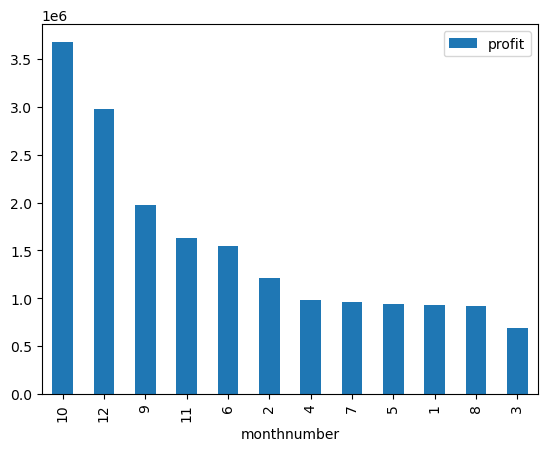

In [481]:
data.groupby('monthnumber').sum()['profit'].reset_index().sort_values(by='profit',ascending=False)\
.plot(kind='bar',x ='monthnumber',y = 'profit' )

In [482]:
print('we had the biggest profit on octomber ')

we had the biggest profit on octomber 


## Question 9: wich segment gave us the biggest profit?

<Axes: xlabel='segment'>

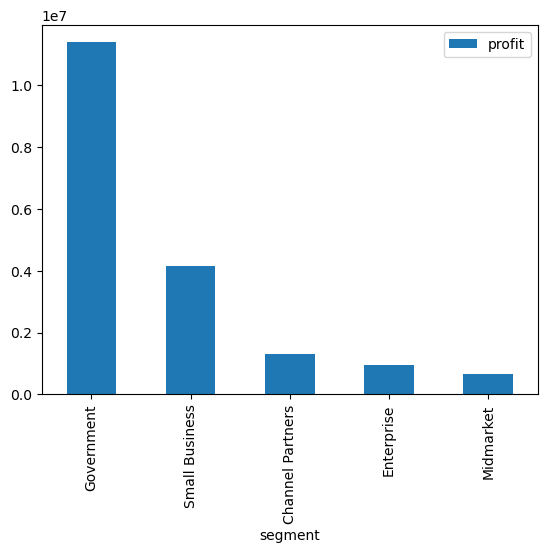

In [483]:
data.groupby('segment').sum()['profit'].reset_index().sort_values(by='profit',ascending=False)\
.plot(kind='bar',x ='segment',y = 'profit' )

In [484]:
print('we had the biggest profit by selling to goverments  ')

we had the biggest profit by selling to goverments  


## Question 10: For each product in each country, did we have a better or a worse profit between 2013 and 2014?

In [491]:
a = data.query('year==2013').groupby(['year','product','country']).sum()['profit'].reset_index()\
.rename(columns={'profit':'profit2013'})

b = data.query('year==2014').groupby(['year','product','country']).sum()['profit'].reset_index()\
.rename(columns={'profit':'profit2014'})

In [492]:
a['profit2014'] = b['profit2014']

In [493]:
a['result'] = a['profit2014'] - a['profit2013']


In [494]:
a

,year,product,country,profit2013,profit2014,result
0,2013,Amarilla,Canada,250085.859375,446440.531250,196354.671875
1,2013,Amarilla,France,149441.109375,553441.500000,404000.375000
2,2013,Amarilla,Germany,268527.156250,406452.625000,137925.468750
3,2013,Amarilla,Mexico,44241.789062,470942.093750,426700.312500
4,2013,Amarilla,United States of America,93681.117188,374730.281250,281049.156250
5,2013,Carretera,Canada,61170.562500,423254.781250,362084.218750
6,2013,Carretera,France,37092.839844,474579.562500,437486.718750
7,2013,Carretera,Germany,23382.779297,456656.906250,433274.125000
8,2013,Carretera,Mexico,80487.921875,442225.500000,361737.562500
9,2013,Carretera,United States of America,7719.759766,282454.281250,274734.531250


### we can see that for every product in every country we have a increase in our profit , lets see the exact percentage

In [495]:
a['increase_percentage'] = (a['profit2014']-a['profit2013'])/a['profit2013']*100

In [496]:
a.sort_values(by='increase_percentage',ascending=False)

,year,product,country,profit2013,profit2014,result,increase_percentage
9,2013,Carretera,United States of America,7719.759766,282454.281250,274734.531250,3558.848145
7,2013,Carretera,Germany,23382.779297,456656.906250,433274.125000,1852.962524
6,2013,Carretera,France,37092.839844,474579.562500,437486.718750,1179.437012
3,2013,Amarilla,Mexico,44241.789062,470942.093750,426700.312500,964.473450
11,2013,Montana,France,53294.589844,431156.281250,377861.687500,709.005737
25,2013,Velo,Canada,46627.757812,364528.062500,317900.312500,681.783386
5,2013,Carretera,Canada,61170.562500,423254.781250,362084.218750,591.925598
10,2013,Montana,Canada,42193.789062,279673.250000,237479.468750,562.830383
8,2013,Carretera,Mexico,80487.921875,442225.500000,361737.562500,449.430847
19,2013,Paseo,United States of America,166302.218750,898896.062500,732593.875000,440.519623


## Question 11:  Plot the sales for each product so far.

In [497]:
q11 = data.query('year == 2014')
q11['monthnumber'] = q11['monthnumber'].replace([1,2,3,4,5,6,7,8,9,10,11,12],[13,14,15,16,17,18,19,20,21,22,23,24])


C:\Users\mplan\AppData\Local\Temp\ipykernel_14440\2640588583.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q11['monthnumber'] = q11['monthnumber'].replace([1,2,3,4,5,6,7,8,9,10,11,12],[13,14,15,16,17,18,19,20,21,22,23,24])


In [498]:
qw = data.query('year == 2013')

In [499]:
df = pd.concat([qw,q11])

In [500]:
df['monthnumber'].unique()

array([10,  9, 11, 12, 13, 18, 24, 15, 19, 20, 21, 14, 22, 16, 17, 23],
      dtype=int64)

In [501]:
df = df.groupby(['product','monthnumber']).sum()['profit'].reset_index()

In [502]:
df

,product,monthnumber,profit
0,Amarilla,9,50549.230469
1,Amarilla,10,560228.750000
2,Amarilla,11,18673.949219
3,Amarilla,12,176525.125000
4,Amarilla,13,76174.953125
...,...,...,...
91,Velo,20,71311.453125
92,Velo,21,45643.750000
93,Velo,22,576903.562500
94,Velo,23,9853.719727


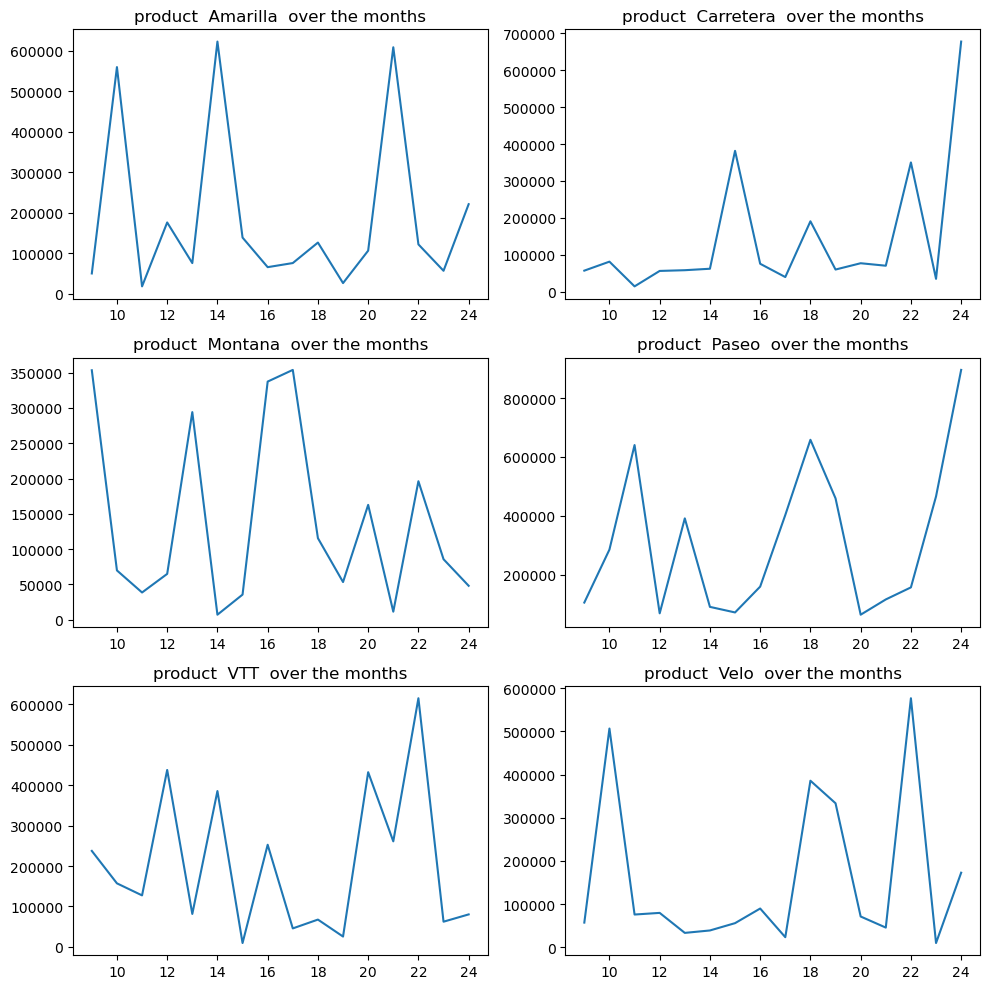

In [503]:
prods = df['product'].unique()
plt.figure(figsize=(10,10))
for i in range(len(df['product'].unique())):
    plt.subplot(3,2,i+1)
    plt.plot(df[df['product'] == prods[i]]['monthnumber'],df[df['product'] == prods[i]]['profit'])
    plt.title(f'product {prods[i]} over the months')
plt.tight_layout()
plt.show()

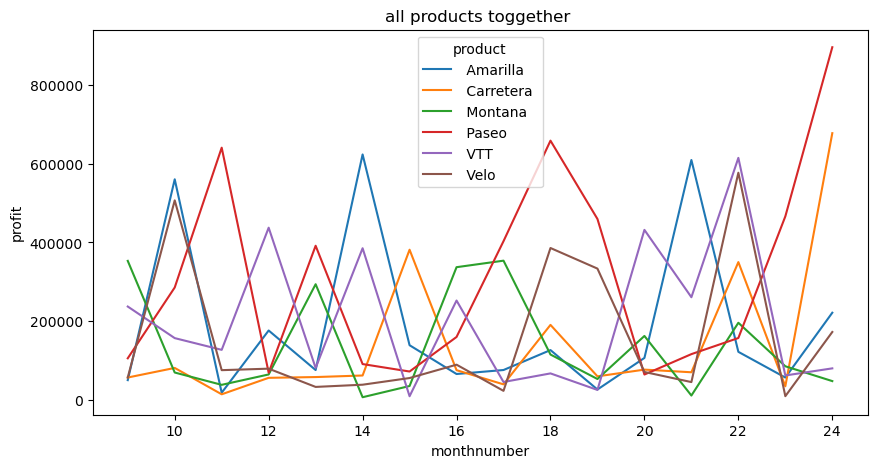

In [504]:
plt.figure(figsize=(10,5))
sns.lineplot(x = df['monthnumber'],y = df['profit'],hue=df['product'])
plt.title('all products toggether ')        
plt.show()